# Levenshtein distance. Damerau–Levenshtein distance

In [1]:
def lev_recursion(a, b, i, j):
    if min(i, j) == 0:
        return max(i, j)

    i1 = i - 1
    j1 = j - 1
    return min(lev_recursion(a, b, i1, j) + 1,
              lev_recursion(a, b, i, j1) + 1,
              lev_recursion(a, b, i1, j1) + (0 if a[i1] == b[j1] else 1))

In [2]:
def lev_table(m, a, b, i, j):
    for x in range(1, i+1):
        for y in range(1, j+1):
            x1 = x - 1
            y1 = y - 1
            m[x][y] = min(m[x1][y] + 1,
                          m[x][y1] + 1,
                          m[x1][y1] + (0 if a[x1] == b[y1] else 1))

    return m[i][j]

In [3]:
def lev_memoization(m, a, b, i, j):
    if m[i][j] != -1:
        return m[i][j]

    if min(i, j) == 0:
        return max(i, j)

    i1 = i - 1
    j1 = j - 1
    r = min(lev_memoization(m, a, b, i1, j) + 1,
            lev_memoization(m, a, b, i, j1) + 1,
            lev_memoization(m, a, b, i1, j1) + (0 if a[i1] == b[j1] else 1))

    m[i][j] = r
    return r

In [4]:
def lev_damerau(m, a, b, i, j):
    for x in range(1, i+1):
        for y in range(1, j+1):
            x1 = x - 1
            y1 = y - 1
            m[x][y] = min(m[x1][y] + 1,
                          m[x][y1] + 1,
                          m[x1][y1] + (0 if a[x1] == b[y1] else 1))

            if i > 1 and j > 1 and a[x1]==b[y-2] and a[x-2]==b[y1]:
                m[x][y] = min(m[x][y], m[x-2][y-2] + 1)
    return m[i][j]

In [5]:
class Lev:
    def __init__(self):
        self.m = []

    def recursion(self, a, b):
        return lev_recursion(a, b, len(a), len(b))

    def table(self, a, b):
        i = len(a)
        j = len(b)
        self.m = [[x + y for x in range(j + 1)] for y in range(i + 1)]
        return lev_table(self.m, a, b, i, j)
    
    def memoization(self, a, b):
        i = len(a)
        j = len(b)
        self.m = [[-1 for _ in range(j + 1)] for _ in range(i + 1)]
        return lev_memoization(self.m, a, b, i, j)
    
    def damerau(self, a, b):
        i = len(a)
        j = len(b)
        self.m = [[x + y for x in range(j + 1)] for y in range(i + 1)]
        return lev_damerau(self.m, a, b, i, j)


    def debug(self, a, b):
        print("{:>8}\t{:>8}".format(a, b), end="\t")
        print('{:2d} {:2d} {:2d} {:2d}'.
              format(self.recursion(a, b), self.table(a, b), self.memoization(a, b), self.damerau(a, b)))

    def print_table(self):
        if len(self.m):
            for x in range(len(self.m)):
                for y in range(len(self.m[0])):
                    print('{:3d} '.format(self.m[x][y]), end='')
                print()
        print()

L = Lev()

# Utilities

In [6]:
import string
import random

def rand_string(l = 8):
    return ''.join(random.choice(string.ascii_lowercase) for i in range(l))

In [7]:
from faker import Faker
def print_csv_test(n=5, allow_equal=True):
    fake = Faker()
    for i in range(n):
        a = fake.word()
        b = fake.word()
        r1 = L.table(a,b)
        r2 = L.damerau(a,b)
        if (allow_equal or r1 != r2):
            print('{},{},{},{}'.format(a, b, r1, r2))
# print_csv_test(1000, False)
# print_csv_test(5)

# Debug

In [8]:
l = [
    ('abc', 'bc'),
    ('abc', 'abc'),
    ('telo', 'ctolb'),
    ('python', 'pyhton'),
    ('kitten', 'sitting'),
]

for a, b in l:
    L.debug(a, b)

print()

print("\n'python', 'pyhton'\n")

pair = l[3]

L.table(*pair)
L.print_table()
L.memoization(*pair)
L.print_table()
L.damerau(*pair)
L.print_table()

     abc	      bc	 1  1  1  1
     abc	     abc	 0  0  0  0
    telo	   ctolb	 3  3  3  3
  python	  pyhton	 2  2  2  1
  kitten	 sitting	 3  3  3  3


'python', 'pyhton'

  0   1   2   3   4   5   6 
  1   0   1   2   3   4   5 
  2   1   0   1   2   3   4 
  3   2   1   1   1   2   3 
  4   3   2   1   2   2   3 
  5   4   3   2   2   2   3 
  6   5   4   3   3   3   2 

 -1  -1  -1  -1  -1  -1  -1 
 -1   0   1   2   3   4   5 
 -1   1   0   1   2   3   4 
 -1   2   1   1   1   2   3 
 -1   3   2   1   2   2   3 
 -1   4   3   2   2   2   3 
 -1   5   4   3   3   3   2 

  0   1   2   3   4   5   6 
  1   0   1   2   3   4   5 
  2   1   0   1   2   3   4 
  3   2   1   1   1   2   3 
  4   3   2   1   1   2   3 
  5   4   3   2   2   1   2 
  6   5   4   3   3   2   1 



# Unit Test

In [9]:
import unittest
import csv

class TestLevenshtein(unittest.TestCase):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.file = '../report/1/inc/func_test.csv'
        self.L = Lev()

    def test_recursion(self):
        self._test(self.L.recursion)

    def test_table(self):
        self._test(self.L.table)

    def test_memoization(self):
        self._test(self.L.memoization)
        
    def test_damerau(self):
        self._test(self.L.damerau, 1)

    def _test(self, f, is_damerau = 0):
        with open(self.file, newline='') as csvfile:
            test = csv.reader(csvfile, delimiter=',', quotechar='|')
            for a, b, r1, r2 in test:
                self.assertEqual(f(a, b), [int(r1), int(r2)][is_damerau])

if __name__ == '__main__':
    unittest.main(argv=['1st-arg-ignored', '-v'], exit=False)

test_damerau (__main__.TestLevenshtein) ... ERROR
test_memoization (__main__.TestLevenshtein) ... ERROR
test_recursion (__main__.TestLevenshtein) ... ERROR
test_table (__main__.TestLevenshtein) ... ERROR

ERROR: test_damerau (__main__.TestLevenshtein)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-9-345cf9054eec>", line 20, in test_damerau
    self._test(self.L.damerau, 1)
  File "<ipython-input-9-345cf9054eec>", line 23, in _test
    with open(self.file, newline='') as csvfile:
FileNotFoundError: [Errno 2] No such file or directory: '../report/1/inc/func_test.csv'

ERROR: test_memoization (__main__.TestLevenshtein)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-9-345cf9054eec>", line 17, in test_memoization
    self._test(self.L.memoization)
  File "<ipython-input-9-345cf9054eec>", line 23, in _test
    with open(self.file,

# Benchmark

In [10]:
import timeit
len_list1 = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
len_list2 = (10, 50, 100, 200, 300)

In [11]:
%%timeit
L.table(*pair)
L.memoization(*pair)
L.damerau(*pair)

95.7 µs ± 6.48 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [12]:
time_mat1 = [[0 for _ in range(len(len_list1))] for _ in range(3)]
time_mat2 = [[0 for _ in range(len(len_list2))] for _ in range(3)]

loop_one = 2

for i in range(len(len_list1)):
    l = len_list1[i]
    for _ in range(loop_one):
        a = rand_string(l)
        b = rand_string(l)

        time_mat1[0][i] += sum(timeit.repeat(lambda:L.recursion(a, b), repeat=2, number=2))
        time_mat1[1][i] += sum(timeit.repeat(lambda:L.table(a, b), repeat=2, number=2))
        time_mat1[2][i] += sum(timeit.repeat(lambda:L.memoization(a, b), repeat=2, number=2))

    for j in range(3):
        time_mat1[j][i] /= 2 * loop_one
        
repeat = 2
number = 10
count_benchmark = loop_one * repeat

for i in range(len(len_list2)):
    l = len_list2[i]
    for _ in range(loop_one):
        a = rand_string(l)
        b = rand_string(l)

        time_mat2[0][i] += sum(timeit.repeat(lambda:L.table(a, b), repeat=repeat, number=number))
        time_mat2[1][i] += sum(timeit.repeat(lambda:L.memoization(a, b), repeat=repeat, number=number))
        time_mat2[2][i] += sum(timeit.repeat(lambda:L.damerau(a, b), repeat=repeat, number=number))

    for j in range(3):
        time_mat2[j][i] /= count_benchmark

In [13]:
%%time
L.recursion(rand_string(8), rand_string(8))

CPU times: user 162 ms, sys: 3 µs, total: 162 ms
Wall time: 167 ms


8

In [14]:
l = 300
a = rand_string(l)
b = rand_string(l)

In [15]:
%%time
L.table(a, b)

CPU times: user 50 ms, sys: 0 ns, total: 50 ms
Wall time: 52.5 ms


267

In [16]:
%%time
L.memoization(a, b)

CPU times: user 93.3 ms, sys: 0 ns, total: 93.3 ms
Wall time: 94.2 ms


267

In [17]:
%%time
L.damerau(a, b)

CPU times: user 60.5 ms, sys: 0 ns, total: 60.5 ms
Wall time: 61.4 ms


267

# Graph

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
plt.rcParams['figure.figsize']=15,10

In [19]:
x1 = np.linspace(len_list1[0], len_list1[-1], num=10, endpoint=True)
x2 = np.linspace(len_list2[0], len_list2[-1], num=20, endpoint=True)

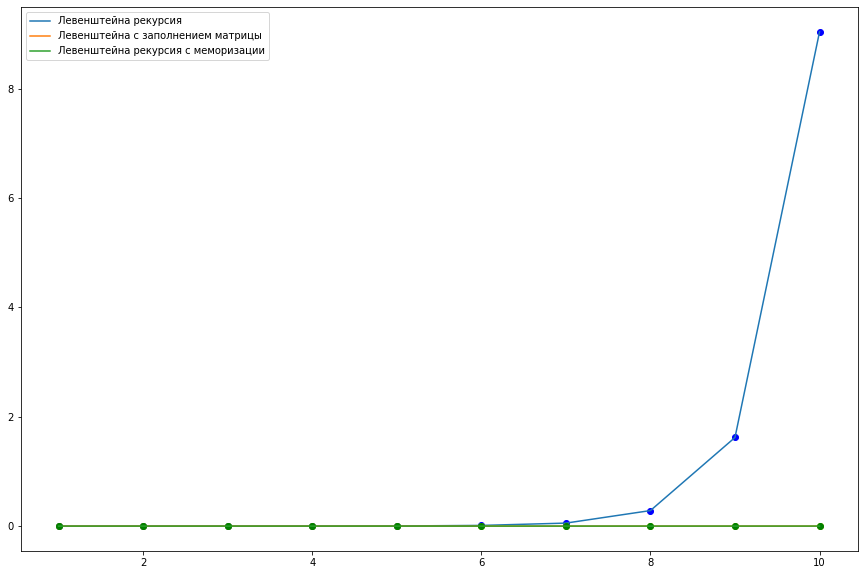

In [20]:
plt.plot(len_list1, time_mat1[0], 'bo')
plt.plot(x1, interp1d(len_list1, time_mat1[0], kind='linear')(x1), '-', label='Левенштейна рекурсия')

plt.plot(len_list1, time_mat1[1], 'yo')
plt.plot(x1, interp1d(len_list1, time_mat1[1], kind='linear')(x1), '-', label='Левенштейна с заполнением матрицы')

plt.plot(len_list1, time_mat1[2], 'go')
plt.plot(x1, interp1d(len_list1, time_mat1[2], kind='linear')(x1), '-', label='Левенштейна рекурсия с меморизации')

plt.legend()

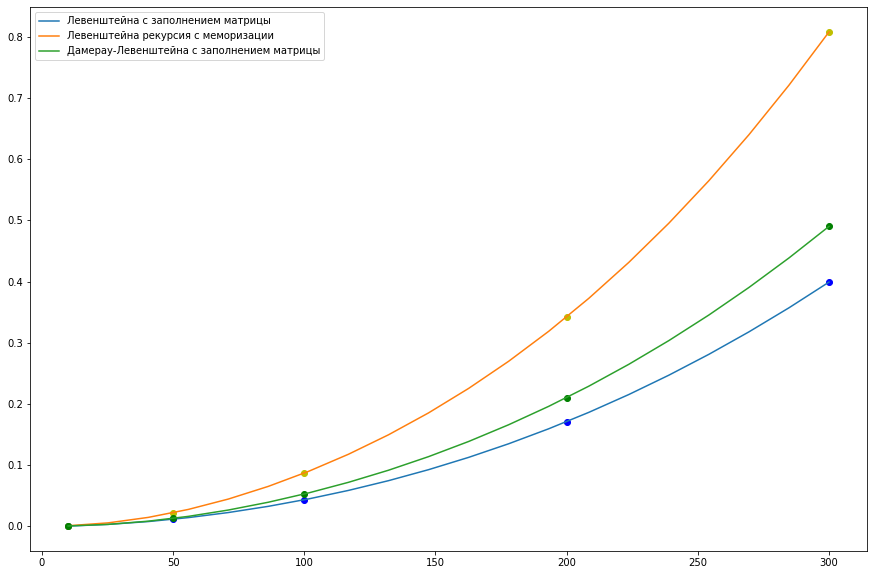

In [21]:
plt.plot(len_list2, time_mat2[0], 'bo')
plt.plot(x2, interp1d(len_list2, time_mat2[0], kind='cubic')(x2), '-', label='Левенштейна с заполнением матрицы')

plt.plot(len_list2, time_mat2[1], 'yo')
plt.plot(x2, interp1d(len_list2, time_mat2[1], kind='cubic')(x2), '-', label='Левенштейна рекурсия с меморизации')

plt.plot(len_list2, time_mat2[2], 'go')
plt.plot(x2, interp1d(len_list2, time_mat2[2], kind='cubic')(x2), '-', label='Дамерау-Левенштейна с заполнением матрицы')

plt.legend()

In [22]:
print("""Usage:
    L.recursion(a, b)
    L.table(a, b)
    L.memoization(a, b)
    L.damerau(a, b)
    L.debug(a, b)        -- compare different algorithms
    L.print_table()      -- print the last used table
    
    add '%%time' to measure running time
""")

Usage:
    L.recursion(a, b)
    L.table(a, b)
    L.memoization(a, b)
    L.damerau(a, b)
    L.debug(a, b)        -- compare different algorithms
    L.print_table()      -- print the last used table
    
    add '%%time' to measure running time



# Защита

In [23]:
# L.debug('qwer','wqre')
L.table('qwer','wqre')
L.print_table()
L.damerau('qwer','wqre')
L.print_table()

  0   1   2   3   4 
  1   1   1   2   3 
  2   1   2   2   3 
  3   2   2   3   2 
  4   3   3   2   3 

  0   1   2   3   4 
  1   1   1   2   3 
  2   1   1   2   3 
  3   2   2   2   2 
  4   3   3   2   2 



qwer wqre = 3  
qwer wqr = 2  
qwe  wq = 2  
qw   w = 1  
q    = 0  

## qwer -> wer -> wqr -> wqre

In [24]:
L.table('kitchen','sitten')
L.print_table()

  0   1   2   3   4   5   6 
  1   1   2   3   4   5   6 
  2   2   1   2   3   4   5 
  3   3   2   1   2   3   4 
  4   4   3   2   2   3   4 
  5   5   4   3   3   3   4 
  6   6   5   4   4   3   4 
  7   7   6   5   5   4   3 



In [25]:
time_mat1

[[5.927249731030315e-06,
  1.725600304780528e-05,
  7.663249925826676e-05,
  0.00040207575148087926,
  0.002197345002059592,
  0.01225781374523649,
  0.05464139774994692,
  0.2840050907507248,
  1.6209440465027,
  9.040177505750762],
 [8.397993951803073e-06,
  1.1830255971290171e-05,
  1.7687503714114428e-05,
  2.6618748961482197e-05,
  3.87027466786094e-05,
  5.0127746362704784e-05,
  5.678875095327385e-05,
  7.105824988684617e-05,
  8.810850340523757e-05,
  0.00010373050099587999],
 [9.29874659050256e-06,
  1.7536745872348547e-05,
  3.0254497687565163e-05,
  5.389024590840563e-05,
  6.980749822105281e-05,
  9.120525282924064e-05,
  0.0001061867515090853,
  0.00014330725025502034,
  0.00016566725389566272,
  0.00020773074720636941]]

In [26]:
time_mat2

[[0.0004902140026388224,
  0.011672111493680859,
  0.04348420174937928,
  0.17115923024903168,
  0.3990977740031667],
 [0.0010679997540137265,
  0.022282961999735562,
  0.08711941975343507,
  0.34216972650392563,
  0.8077361032446788],
 [0.000756589746742975,
  0.013080776494462043,
  0.052919727997505106,
  0.21048757599055534,
  0.4900876582505589]]